In [1]:
import numpy as np
import pandas as pd

In [2]:
laptops = pd.read_csv("laptops.csv", encoding="latin-1")
laptops

Manufacturer                                 Model Name  \
0           Apple                                MacBook Pro   
1           Apple                                Macbook Air   
2              HP                                     250 G6   
3           Apple                                MacBook Pro   
4           Apple                                MacBook Pro   
5            Acer                                   Aspire 3   
6           Apple                                MacBook Pro   
7           Apple                                Macbook Air   
8            Asus                            ZenBook UX430UN   
9            Acer                                    Swift 3   
10             HP                                     250 G6   
11             HP                                     250 G6   
12          Apple                                MacBook Pro   
13           Dell                              Inspiron 3567   
14          Apple                                MacBook 12"   
15          Apple                                MacBook Pro   
16           Dell                              Inspiron 3567   
17          Apple                                MacBook Pro   
18         Lenovo                          IdeaPad 320-15IKB   
19           Dell                                     XPS 13   
20           Asus                            Vivobook E200HA   
21         Lenovo                         Legion Y520-15IKBN   
22             HP                                     255 G6   
23           Dell                              Inspiron 5379   
24             HP    15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)   
25           Dell                              Inspiron 3567   
26          Apple                                MacBook Air   
27           Dell                              Inspiron 5570   
28           Dell                              Latitude 5590   
29             HP                                ProBook 470   
...           ...                                        ...   
1273           HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1274         Asus        X553SA-XX031T (N3050/4GB/500GB/W10)   
1275         Asus                       ZenBook UX305CA-UBM1   
1276         Dell                              Inspiron 3567   
1277         Acer                             Aspire ES1-531   
1278         Dell                              Inspiron 3552   
1279       Lenovo                         IdeaPad Y700-15ISK   
1280           HP                        Pavilion 15-AW003nv   
1281         Dell                              Inspiron 3567   
1282           HP                           Stream 11-Y000na   
1283         Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   
1284       Lenovo                             Yoga 500-14ISK   
1285       Lenovo                             Yoga 900-13ISK   
1286       Lenovo                         IdeaPad 100S-14IBR   
1287           HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1288         Asus        X553SA-XX031T (N3050/4GB/500GB/W10)   
1289         Asus                       ZenBook UX305CA-UBM1   
1290         Dell                              Inspiron 3567   
1291         Acer                             Aspire ES1-531   
1292         Dell                              Inspiron 3552   
1293       Lenovo                         IdeaPad Y700-15ISK   
1294           HP                        Pavilion 15-AW003nv   
1295         Dell                              Inspiron 3567   
1296           HP                           Stream 11-Y000na   
1297         Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   
1298       Lenovo                             Yoga 500-14ISK   
1299       Lenovo                             Yoga 900-13ISK   
1300       Lenovo                         IdeaPad 100S-14IBR   
1301           HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302         Asus        X553SA-XX031T (N3050/4GB/500GB/W10)   

                Category Screen Size

1/ Redo the cleaning processes as presented in the data cleaning notebook, that include:
- Clean column names

- Convert RAM, Price, Weight into numerical columns (create new columns)

- Extract CPU speed from CPU column

- Correcting values of os column

- Handle missing values of os_version column

In [11]:
def clean_column_name(n):
    return n.strip().replace('Operating System','os').replace(' ', '_').replace('(', '').replace(')', '').lower()
laptops.columns = [clean_column_name(label) for label in laptops.columns]     
laptops.columns
laptops['ram_gb'] = laptops.ram.str.slice(0, -2).astype('int')
laptops["price_euros_num"] = laptops.price_euros.str.replace(",", ".").astype("float")
laptops["weight_kg"] = laptops["weight"].str.replace("kg", "").str.replace("s", "").astype("float")
laptops["cpu_speed_ghz"] =  laptops.cpu.str.replace("GHz", "").str.extract(" ([0-9\.]*)$").astype("float")
mapping = {"Windows": "Windows", "No OS": "No OS", "Linux": "Linux", "Chrome OS": "Chrome OS",
           "macOS": "macOS", "Mac OS": "macOS", "Android": "Android"}
laptops['os_new'] = laptops.os.map(mapping)

2/ Convert Screen Size column in to numeric and use that column to answer:
- What is the popular screen size ?
- What is the minimum screen size of Ultrabook ?
- What is the average screen size of gaming laptop ?

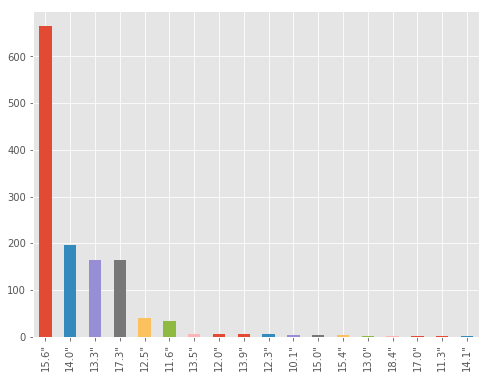

In [20]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [8, 6]
laptops.screen_size.value_counts().plot.bar()


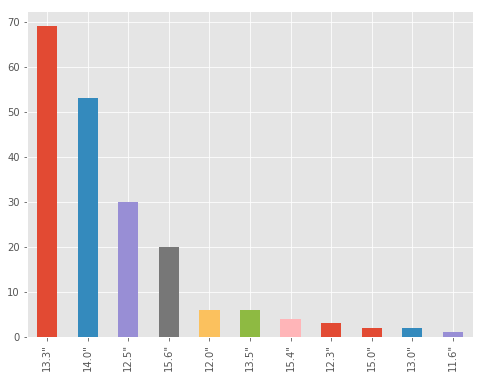

In [22]:
laptops[laptops['category'] == 'Ultrabook'].screen_size.value_counts().plot.bar()

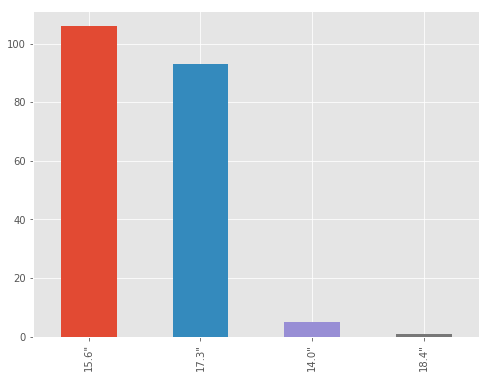

In [36]:
laptops[laptops['category'] == 'Gaming'].screen_size.value_counts().plot.bar()

3/ Extract Screen Resolution (for example 2880x1800), and answer:
- How many laptop has full hd (1920x1080) screen ?
- What is the popular screen resolution of Macbook ?

In [54]:
laptops.screen.unique()
laptops['resolution'] = laptops.screen.str.extract("([0-9]{1,4}x[0-9]{1,4})")
laptops[laptops['resolution'] == '1920x1080'].model_name()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'IPS Panel Retina Display 2880x1800',
       'IPS Panel Retina Display 2304x1440', '1366x768'], dtype=object)

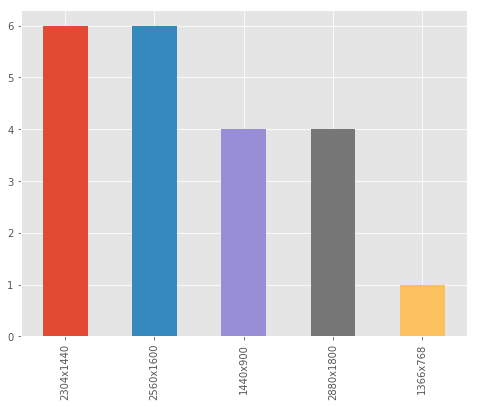

In [56]:
laptops.os_new.unique()
laptops[laptops['os_new'] == 'macOS'].resolution.value_counts().plot.bar()

4/ Using column storage to create 3 new columns named: storage_gb, storage_ssd, storage_hdd. storage_gb stores the volume of the storage. storage_ssd indicates whether a storage is ssd; values of storage_ssd is either 0 or 1 where 1 means the storage device is ssd. storage_hdd indicates whether a storage is hdd; values of storage_hdd is either 0 or 1 where 1 means the storage device is hdd. Use this column to answer:
- How many laptop have ssd storage ? How many laptop have hdd storage ?
- On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.

In [57]:
laptops.storage.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '1GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid',
       '512GB SSD +  1TB Hybrid', '256GB SSD +  1TB Hybrid'], dtype=object)

In [96]:
import re
def calculate_total_size(a):
    sum = 0
    for disk in a:
        if (isinstance(disk, str) and disk.endswith('GB')):
            sum += int(re.findall("\d+", disk)[0])
        if (isinstance(disk, str) and disk.endswith('TB')):
            sum += int(re.findall("\d+", disk)[0]) * 1024
    return sum

laptops['storage_gb']=laptops.storage.str.extractall('([0-9]{1,3}[TG]B)').unstack().apply(calculate_total_size, axis=1)
laptops['storage_ssd']=laptops.storage.str.contains('SSD')*1
laptops['storage_hdd']=laptops.storage.str.contains('HDD')*1
laptops[laptops['storage_ssd'] == 1].shape

(843, 22)

In [95]:
laptops[laptops['storage_hdd'] == 1].shape

(576, 22)

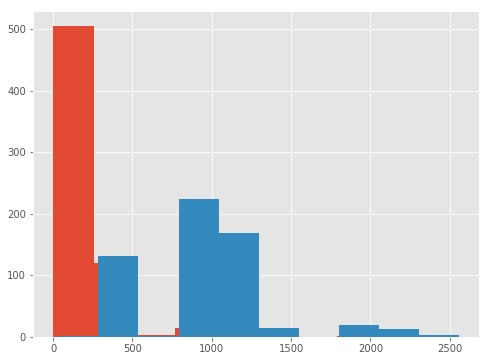

In [105]:
ax = laptops[laptops['storage_ssd'] == 1].storage_gb.hist()
laptops[laptops['storage_hdd'] == 1].storage_gb.hist(ax=ax)